In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import gc
import random
import warnings
import pickle

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from utils.train_utils import *
warnings.filterwarnings(action='ignore')
path = '../data/train_results/morning_results/'

In [2]:
### cycle
with open(path + 'm_cycle_results_list.pkl', 'rb') as f:
    cycle_results_list = pickle.load(f)
train_x_cycle, train_y_cycle, train_pred_cycle,\
valid_time_x_cycle, valid_x_cycle, valid_y_cycle = cycle_results_list

### trend
with open(path + 'm_trend_results_list.pkl', 'rb') as f:
    trend_results_list = pickle.load(f)
train_x_trend, train_y_trend, train_pred_trend,\
valid_time_x_trend, valid_x_trend, valid_y_trend = trend_results_list

### morning scaler
with open('../data/preprocess/scalers.pkl', 'rb') as f:
    sclaers = pickle.load(f)# [m_time_scaler, l_time_scaler, e_time_scaler, no_time_scaler]
time_scaler = sclaers[0]

In [3]:
total_results_list = []
for i in range(6):
    total_results_list.append(trend_results_list[i] + cycle_results_list[i])
    
new_total_results_list = []
for data in total_results_list:
    shape = data.shape
    data = time_scaler.inverse_transform(data.reshape(-1), select_col = 1)
    new_total_results_list.append(data.reshape(shape))

In [4]:
from utils.preprocess_utils import *
from utils.train_utils import *
### morning data
with open('../data/preprocess/m_data_list.pkl', 'rb') as f:
    data_list = pickle.load(f)
    
train_time, train_notime, train_y,\
valid_time, valid_notime, valid_y, \
test_time, test_notime, test_y = numpy2tensor(data_list)

In [10]:
time = pd.read_csv('../data/original/time_data.txt', sep = ' ')
nontime = pd.read_csv('../data/original/nontime_data.txt', sep = ' ')
day_list = time.STD_YMD.unique()

In [50]:
for idx, day in enumerate(day_list):
    if day == '2019-05-31':
        print(idx, day)

119 2019-05-31


In [ ]:
24 + 

In [31]:
def train_idx2day(idx, train_len):
    day_len = int(train_len//69)
    day_idx = idx % day_len
    if day_idx <= 86:
        return day_list[day_idx + 3]
    elif day_idx > 86:
        return day_list[day_idx + 36]
        
def valid_idx2day(idx, vaild_len):
    day_len = int(valid_len//69)
    day_idx = idx % day_len
    return day_list[day_idx + 171]

def test_idx2day(idx, test_len):
    day_len = int(test_len//69)
    day_idx = idx % day_len
    return day_list[day_idx + 191]

In [42]:
len(train_time)//69

143

In [47]:
idx2day(143 + 86, len(train_time))

'2020-02-25'

2020-02-23


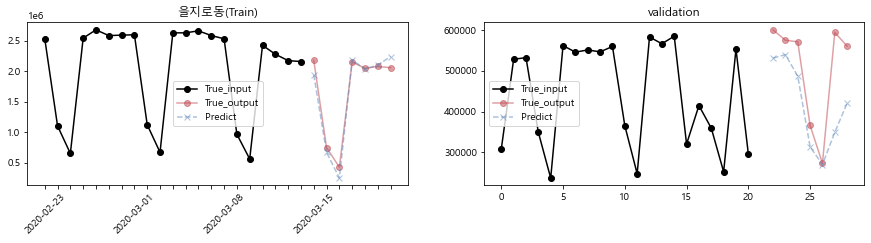

2019-03-03


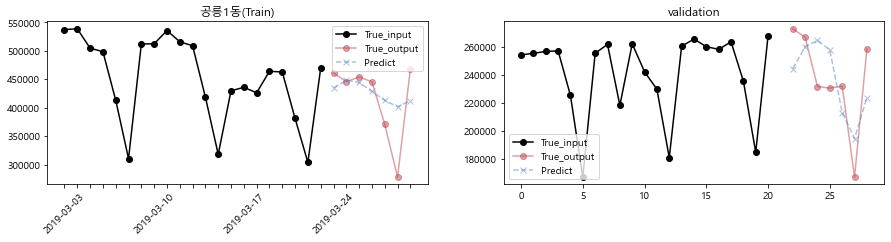

2019-04-12


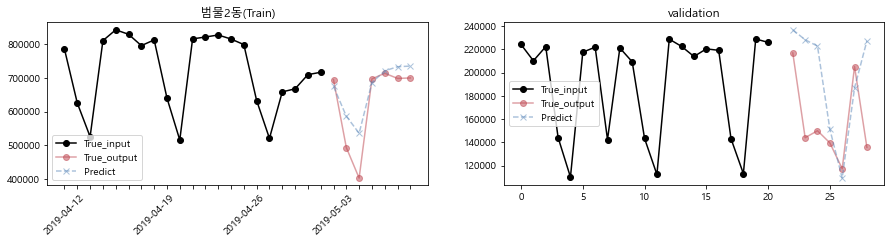

2020-03-27


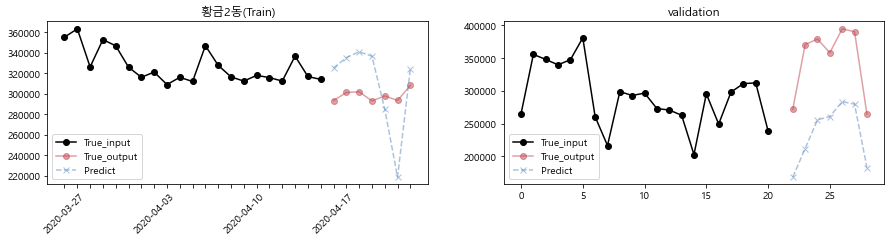

2019-04-07


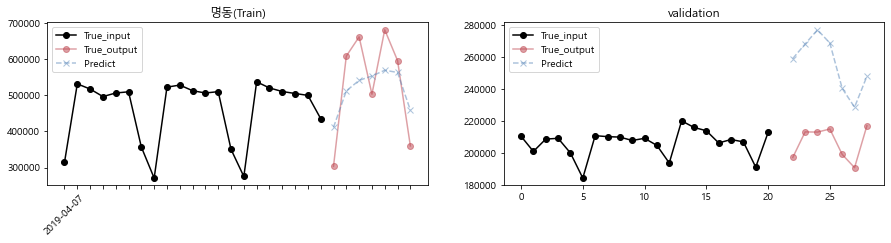

2020-02-23


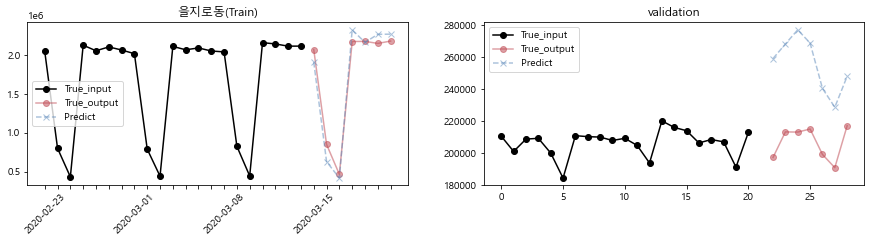

None


TypeError: only size-1 arrays can be converted to Python scalars

In [5]:
train_x, train_y, train_pred,\
                valid_time_x, valid_x, valid_y= new_total_results_list

plot_predict(train_x, train_y, train_pred,\
                valid_time_x, valid_x, valid_y )
with open(path + 'm_total_results_list.pkl', 'wb') as f:
    pickle.dump(new_total_results_list, f)

In [12]:
### morning scaler
with open('../data/preprocess/scalers.pkl', 'rb') as f:
    sclaers = pickle.load(f)# [m_time_scaler, l_time_scaler, e_time_scaler, no_time_scaler]
time_scaler = sclaers[0]

with open('../data/preprocess/june_data/morning_june_time.pkl', 'rb') as f:
    morning_time = pickle.load(f)
with open('../data/predict_june/predict_cycle_trend/june_morning_cycle_pred.pkl', 'rb') as f:
    morning_cycle_pred = pickle.load(f)
with open('../data/predict_june/predict_cycle_trend/june_morning_trend_pred.pkl', 'rb') as f:
    morning_trend_pred = pickle.load(f)
    
def resize(data, select_col = 0):
    shape = data.shape
    data = time_scaler.inverse_transform(data.reshape(-1), select_col = 0)
    return data.reshape(shape)

morning_pred = morning_trend_pred + morning_cycle_pred
morning_x = morning_time[:,:,-2] + morning_time[:,:,-1]
morning_pred = resize(morning_pred, select_col = 0)
morning_x = resize(morning_x, select_col = 0)

In [10]:
nontime = pd.read_csv('../data/original/nontime_data.txt', sep = ' ')
time = pd.read_csv('../data/original/time_data.txt', sep = ' ')
dong_list= time.HDONG_NM.unique()

code_list = [1114065000, 1114061500, 2726066200, 2726061000, 2711067000,
       2726065100, 1114066500, 2726062000, 2726051000, 1135057000,
       2711068000, 1114068000, 2726068000, 1135063000, 1114067000,
       2711069000, 1114055000, 2726053000, 1135070000, 1114059000,
       1135062400, 1135059500, 1135061200, 1114054000, 2711064000,
       1135061100, 1114062500, 2711066000, 1114064500, 2726055000,
       1135069500, 1135072000, 2726056000, 2711054500, 2726064000,
       1135060000, 2726060100, 1135062500, 2726052000, 2726063000,
       2726069000, 2726065200, 2726059000, 2711051700, 2726057000,
       1114052000, 2726066100, 1135067000, 1114060500, 1135066500,
       2726054000, 2711065000, 1135056000, 2726060200, 2726067000,
       1135058000, 2711058500, 1114063500, 1135064000, 2726056100,
       1135062100, 2726058000, 2711056500, 1135061900, 1135071000,
       1114058000, 1114057000, 2711057500, 2711059500]
       
def name2index(dong_name):
    for idx, code in enumerate(code_list):
        if code == time[time.HDONG_NM == dong_name].HDONG_CD.iloc[0]:
            return(idx)


pred_june = pd.DataFrame([morning_pred[name2index(dong)] for dong in dong_list])
pred_june.columns = ['2020-06-01','2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07']
pred_june.index = dong_list
pred_june['AREA'] = [nontime[nontime.HDONG_NM == dong].AREA.iloc[0] for dong in dong_list]
how_insame = pred_june.copy()
how_inother = pred_june.copy()

def find_level(pred, dong_name):
    '''
    0 ~20 : 1 
    20~40 : 2
    40~60 : 3
    60~80 : 4
    80~100: 5
    '''
    dist = np.array(time[(time.HDONG_NM == dong_name)&(time.time == 'evening')].flow_pop.iloc[-30:].sort_values())
    for idx, val in enumerate(dist):
        if val > pred:
            break
    if idx == 30-1:
        return 1
    else:
        return int(((idx+1)/30) * 100 // 20) + 1

for dong in dong_list:
    for day in ['2020-06-01','2020-06-02','2020-06-03','2020-06-04','2020-06-05','2020-06-06','2020-06-07']:
        how_insame.loc[dong,day] = find_level(pred_june.loc[dong,day],dong)

In [11]:
flowperarea = pd.DataFrame({'flowperarea':pred_june.iloc[:,:7].mean(axis = 1)})
for idx, dong in enumerate(dong_list):
    flowperarea.iloc[idx] = flowperarea.iloc[idx] / nontime[nontime.HDONG_NM == dong].AREA.iloc[0] * 100
flowperarea = np.array(flowperarea.flowperarea.sort_values())

def find_level_other(pred, dong_name):
    '''
    0 ~20 : 1 
    20~40 : 2
    40~60 : 3
    60~80 : 4
    80~100: 5
    '''
    for idx, val in enumerate(flowperarea):
        if val > pred:
            break
    if idx == 68:
        return 1
    else:
        return int(((idx+1)/69) * 100 // 20) + 1
how_inother = pred_june.copy()
for dong in dong_list:
    for day in ['2020-06-01','2020-06-02','2020-06-03','2020-06-04','2020-06-05','2020-06-06','2020-06-07']:
        how_inother.loc[dong,day] = find_level_other(how_inother.loc[dong,day] / how_inother.loc[dong,"AREA"] * 100, dong)

In [12]:
how_insame.to_csv('../data/predict_june/result_june/morning_insame.csv')
how_inother.to_csv('../data/predict_june/result_june/morning_inother.csv')

In [13]:
print("아침")
display(how_insame.loc[['중림동','소공동','회현동']])
display(how_inother.loc[['중림동','소공동','회현동']])

아침


,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,AREA
중림동,1.0,1.0,2.0,2.0,1.0,1.0,1.0,482329.92
소공동,3.0,1.0,1.0,1.0,3.0,2.0,1.0,893419.62
회현동,3.0,5.0,1.0,5.0,3.0,1.0,1.0,847351.57


,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,AREA
중림동,4.0,4.0,4.0,4.0,4.0,3.0,3.0,482329.92
소공동,1.0,1.0,1.0,1.0,1.0,5.0,5.0,893419.62
회현동,1.0,1.0,1.0,1.0,1.0,5.0,4.0,847351.57
